<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EC%BB%B4%ED%93%A8%ED%84%B0%EA%B8%B0%EC%B4%88/Section5_sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE 1 해시

### 해시테이블(Hash Table)

- 임의의 길이의 데이터를 고정된 길이의 배열에 저장
- key를 hash함수에 넣어 도출된 hash를 인덱스삼아 bucket에 value를 저장한다.
- 입력값의 2배인 배열을 사용하여 공간복잡도가 높다.(데이터양에 영향을 덜 받음)
- 시간복잡도는 O(1)이며 해시충돌이 발생할 경우 O(n)

#### 해시함수(Hash Function)
- Key를 **고정된 길이**의 hash로 변경해주는 역할(=Hashing)
- Key마다 고유한 인덱스값을 설정하기 위한 방법

1. Division Method
- 입력값을 테이블의 크기로 나누어 계산 (입력값%테이블크기) 
- 테이블의 크기는 소수이며 $2^n$과 먼 값을 사용해야 효과가 좋다고 함
2. Digit Folding
- 각 Key의 문자열을 아스키코드로 바꾸고 합하여 테이블주소로 사용

In [36]:
# 해싱함수
def hashing_func(str, list_size):       # str = key(입력값), list_size = 해시배열개수
    bytes_representation = str.encode() # 입력값을 인코딩(숫자화, 문자별 byte형태로 저장됨)  
    sum = 0                             
    for byte in bytes_representation:   # 글자를 숫자로 모두 바꾼 뒤 더하기
        sum += byte

    return sum % list_size              # 인코딩 하여 더한 숫자를 배열수로 나눠서 해시를 부여

In [35]:
# 해싱함수 테스트
hs_list = [None] * 5   # [[] for i in range(5)]

hs_list[hashing_func("key1", len(hs_list))] = "value1" # 테이블[해시함수('key', 배열수)]
hs_list[hashing_func("key2", len(hs_list))] = 'value2' 

print(hs_list)
print(hs_list[hashing_func("key1", len(hs_list))])

[None, None, None, 'value1', 'value2']
value1


### 해시충돌

- 해시테이블은 하나의 key에 하나의 hash를 부여하는 테이블이다.
- 두 가지의 key를 해시함수에 넣었을 때 같은 해시가 나오는 경우에 해시충돌이라 한다.



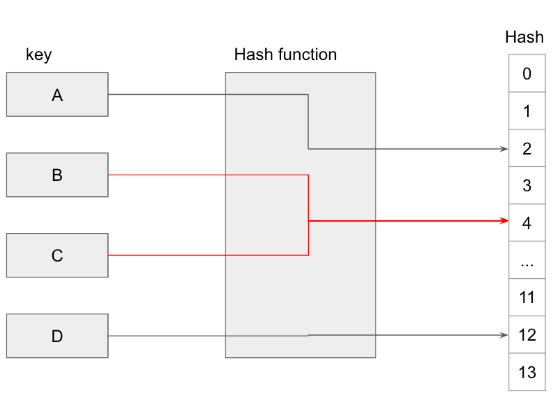

In [42]:
# 해시테이블
hash_table = [None]*5
print(hash_table, len(hash_table))

[None, None, None, None, None] 5


In [43]:
# 해시함수 
def hash_func(key):
    return key%len(hash_table)

print(hash_func(10))
print(hash_func(20))
print(hash_func(12))

0
0
2


In [ ]:
# 해시테이블에 값 추가
def insert_hash(key,value):
    hash = hash_func(key)
    hash_table[hash] = value

In [48]:
# 해시충돌
insert_hash(42,'김민철') # 나머지가 2 = 해시가 2
insert_hash(32,'이진우') # 얘도 나머지가 2 = 해시가 2
insert_hash(31,'고은비')

print(hash_table) # 김민철 위에 이진우가 덮어씀

[None, '고은비', '이진우', None, None]


#### 충돌방지 1 : Chaining(체이닝)

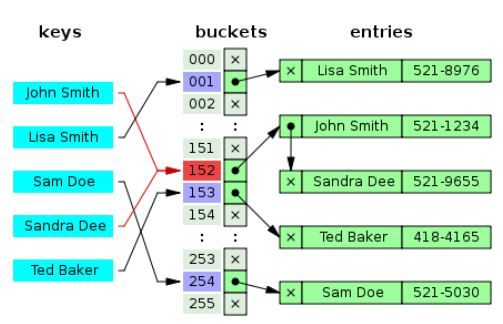

- 다른 key를 넣었을 때 동일한 해시가 도출되면 버킷에 다음 키값을 연결
- bucket에서 연결될 수 있는 entry에 제한을 두지않는 체인(연결리스트)형태로 연결

In [69]:
# 해시테이블
chain_hash_table = [[] for _ in range(10)]  
print(chain_hash_table)

[[], [], [], [], [], [], [], [], [], []]


In [70]:
# 해시함수
def chain_hash_func(key):
    return key%len(chain_hash_table)

In [71]:
# 체인해시 삽입방법
def chain_insert_func(key,value):
    hash= chain_hash_func(key)
    chain_hash_table[hash].append(value)

chain_insert_func(31,'고은비')
chain_insert_func(32,'김민철')
chain_insert_func(32,'이진우')

print(chain_hash_table)                      # 전체 테이블
print(chain_hash_table[chain_hash_func(32)]) # hash값으로 찾기

[[], ['고은비'], ['김민철', '이진우'], [], [], [], [], [], [], []]
['김민철', '이진우']


#### 충돌방지 2 : open addressing(오픈어드레싱)


- 해시충돌이 일어났을 때 비어있는 배열을 찾아서 데이터를 저장한다.
- 체이닝과 다르게 저장공간이 고정되어있다.(하나의 bucket에 하나의 entry)
- 파이썬도 내부적으로 오픈어드레싱 방식을 활용, 빈공간이 없는 경우 오래걸림
- 따라서 로드팩터를 작게 설정하여 성능저하문제를 해결

**Load Factor**
- 해시테이블의 아이템수 / 해시테이블의 배열 수

# NOTE 2

# NOTE 3

# NOTE 4